In [1]:
import numpy as np
import pandas as pd
from glob import glob
import os
from os import walk
from matplotlib import pyplot as plt

In [2]:
clean_path = '../outputs/mapper/HBN/degreelist/'
subject_flist = list(walk(clean_path))[0][2]

In [3]:
sublist_d = []
degree_list = []
degree_mean = []
for s in subject_flist:
    sub=s[:-4]
    sublist_d.append(sub)
    d = np.load(f'{clean_path}{s}')
    degree_list.append(d)
    degree_mean.append(d.mean())

In [4]:
#load data
all_dx = np.load('../sourcedata/data/HBN/phenotype/parsed/dx_list.npy')
sub_list = np.load('../sourcedata/data/HBN/phenotype/parsed/sub_list.npy')
dx_array = np.load('../sourcedata/data/HBN/phenotype/parsed/dx_onehot.npy')

sub_list = list(sub_list)

In [5]:
len(sub_list)

3615

In [6]:
sub_ids = [s[4:] for s in sublist_d]

dx_count = 0
dne_count = 0

sub_list_w_dx = [] # ru subjects with diagnostic data available
dx_list_w_dx = [] # corresponding list of dx one hot data

for s in sub_ids:
    try:
        ind = sub_list.index(s)
        dx_count = dx_count+1
        sub_list_w_dx.append(sub_list[ind])
        dx_list_w_dx.append(dx_array[ind])
        
    except:
        #print("DNE")
        dne_count=dne_count+1
print(f"no dx data for: {dne_count}")
print(f"dx data for: {dx_count}")

no dx data for: 39
dx data for: 666


In [7]:
list(all_dx).index('Autism Spectrum Disorder')

9

In [8]:
dx_df = pd.DataFrame(dx_list_w_dx)
dx_df.columns = all_dx
dx_sum = dx_df.sum()
print(dx_sum.to_string())

ADHD-Combined Type                                                              152.0
ADHD-Hyperactive/Impulsive Type                                                  22.0
ADHD-Inattentive Type                                                           180.0
Acute Stress Disorder                                                             0.0
Adjustment Disorders                                                             15.0
Agoraphobia                                                                       1.0
Alcohol Use Disorder                                                              1.0
Anorexia Nervosa-Binge Eating/Purging Type                                        1.0
Anorexia Nervosa-Restricting Type                                                 0.0
Autism Spectrum Disorder                                                         93.0
Avoidant/Restrictive Food Intake Disorder                                         1.0
Binge-Eating Disorder                                 

In [9]:
adhd_inds = [0,1,2,58,99]
depression_inds = [27,45,60,74,101]
nt_inds = [50]
asd_inds = [9]

In [10]:
adhd=[]
not_adhd=[]
for i,d in enumerate(dx_list_w_dx):
    if d[0] or d[1] or d[2] or d[58] or d[99]:
        adhd.append(i)
    else:
        not_adhd.append(i)
depression=[]
not_depression=[]
for i,d in enumerate(dx_list_w_dx):
    if d[27] or d[45] or d[60] or d[74] or d[101]:
        depression.append(i)
    else:
        not_depression.append(i)
nt=[]
for i,d in enumerate(dx_list_w_dx):
    if d[50]:
        nt.append(i)
asd=[]
for i,d in enumerate(dx_list_w_dx):
    if d[9]:
        asd.append(i)

In [ ]:
adhd_list = np.array(degree_mean)[adhd]
not_adhd_list = np.array(degree_mean)[not_adhd]
depression_list = np.array(degree_mean)[depression]
not_depression_list = np.array(degree_mean)[not_depression]
nt_list =  np.array(degree_mean)[nt]
asd_list =  np.array(degree_mean)[asd]

len(asd_list)




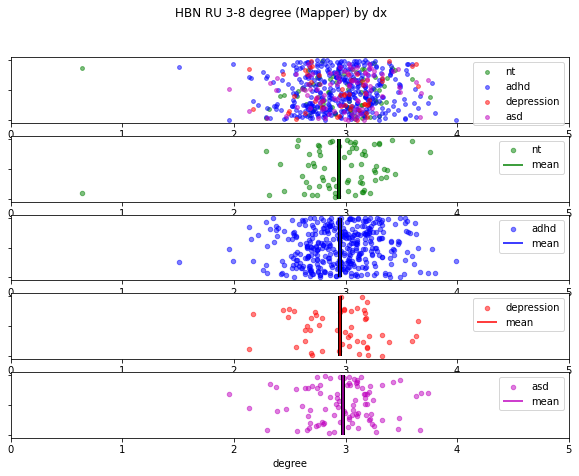

In [155]:
fig, axs = plt.subplots(5,figsize=(10,7))
fig.suptitle('HBN RU 3-8 degree (Mapper) by dx')
axs[0].scatter(nt_list,np.random.random(nt_list.shape),15,label='nt',c='g',alpha=0.5)
axs[0].scatter(adhd_list,np.random.random(adhd_list.shape),15,label='adhd',c='b',alpha=0.5)
axs[0].scatter(depression_list,np.random.random(depression_list.shape),15,label='depression',c='r',alpha=0.5)
axs[0].scatter(asd_list,np.random.random(asd_list.shape),15,label='asd',c='m',alpha=0.5)
axs[0].set_yticklabels([])
axs[0].legend()
axs[0].set_xlim(0,5)

axs[1].scatter(nt_list,np.random.random(nt_list.shape),20,label='nt',c='g',alpha=0.5)
axs[1].set_yticklabels([])
axs[1].set_xlim(0,5)
axs[1].vlines(nt_list.mean(), 0, 1, 'k',linewidth=4)
axs[1].vlines(nt_list.mean(), 0, 1, 'g',label='mean')
axs[1].legend()

axs[2].scatter(adhd_list,np.random.random(adhd_list.shape),20,label='adhd',c='b',alpha=0.5)
axs[2].set_yticklabels([])
axs[2].set_xlim(0,5)
axs[2].vlines(adhd_list.mean(), 0, 1, 'k',linewidth=4)
axs[2].vlines(adhd_list.mean(), 0, 1, 'b',label='mean')
axs[2].legend()

axs[3].scatter(depression_list,np.random.random(depression_list.shape),20,label='depression',c='r',alpha=0.5)
axs[3].set_yticklabels([])
axs[3].set_xlim(0,5)
axs[3].vlines(depression_list.mean(), 0, 1, 'k',linewidth=4)
axs[3].vlines(depression_list.mean(), 0, 1, 'r',label='mean')
axs[3].set_xlabel('degree')
axs[3].legend()


axs[4].scatter(asd_list,np.random.random(asd_list.shape),20,label='asd',c='m',alpha=0.5)
axs[4].set_yticklabels([])
axs[4].set_xlim(0,5)
axs[4].vlines(asd_list.mean(), 0, 1, 'k',linewidth=4)
axs[4].vlines(asd_list.mean(), 0, 1, 'm',label='mean')
axs[4].set_xlabel('degree')
axs[4].legend()


In [46]:
list(all_dx).index('Other Specified Depressive Disorder')

101

In [14]:
adhd_list = np.array(degree_list)[adhd]
not_adhd_list = np.array(degree_list)[not_adhd]
depression_list = np.array(degree_list)[depression]
not_depression_list = np.array(degree_list)[not_depression]
nt_list =  np.array(degree_list)[nt]
asd_list =  np.array(degree_list)[asd]

len(asd_list)


<ipython-input-14-0ff9679bb497>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  adhd_list = np.array(degree_list)[adhd]
<ipython-input-14-0ff9679bb497>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  not_adhd_list = np.array(degree_list)[not_adhd]
<ipython-input-14-0ff9679bb497>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  depres

93

In [ ]:
from scipy.stats import sem

In [28]:
def plot_degree(list_in,title):
    list_in = [n for n in list_in if len(n)==750]
    degree_list = np.array(list_in)
    degree_list_sem = sem(degree_list)
    degree_list_mean = np.mean(degree_list, axis=0)

    plt.figure(figsize=(20, 3),facecolor='white')


    for d in degree_list:
        if len(d) == 750:
            plt.plot(d,linewidth=0.5)

    x=np.arange(degree_list_mean.shape[0])
    y=degree_list_mean
    error=degree_list_sem/2
    #plt.plot(flow_10hz/max(flow_10hz),label='normalized optic flow',c='b',linewidth=2)
    plt.plot(x,y,label='mean degree',c='k',linewidth=2)
    plt.fill_between(x, y-error, y+error, label = 'sem degree',edgecolor='k', facecolor='gray')
    plt.ylabel('degree')
    plt.xlabel('TR')
    plt.legend()
    plt.title(f'{title}')

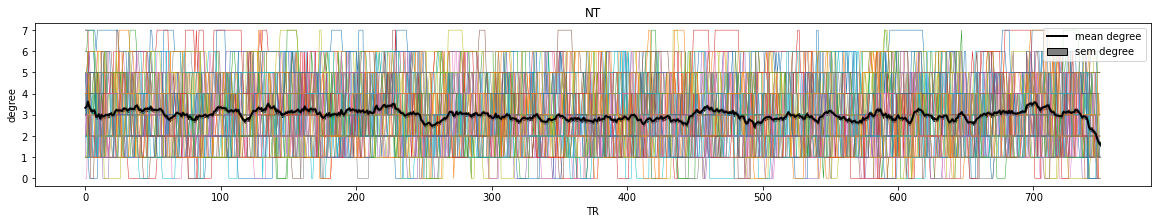

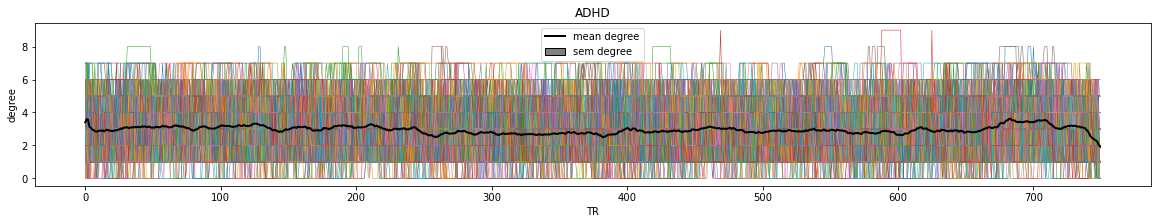

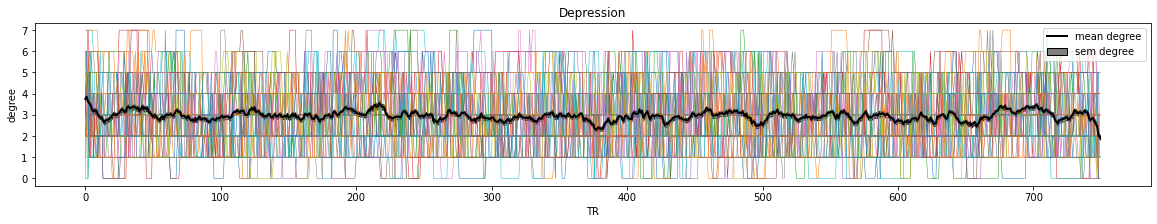

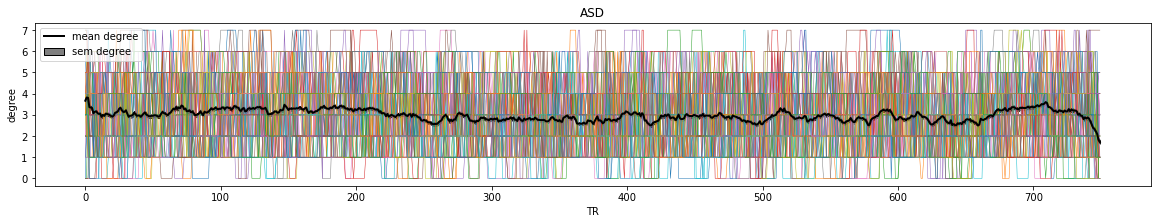

In [31]:
plot_degree(nt_list,'NT')
plot_degree(adhd_list,'ADHD')
plot_degree(depression_list,'Depression')
plot_degree(asd_list,'ASD')